In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"]=iris.target
df["species_name"] = df["species"].apply(lambda x : iris.target_names[x])
df=df.drop(["sepal length (cm)","sepal width (cm)"],axis=1)
df

,petal length (cm),petal width (cm),species,species_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa
...,...,...,...,...
145,5.2,2.3,2,virginica
146,5.0,1.9,2,virginica
147,5.2,2.0,2,virginica
148,5.4,2.3,2,virginica


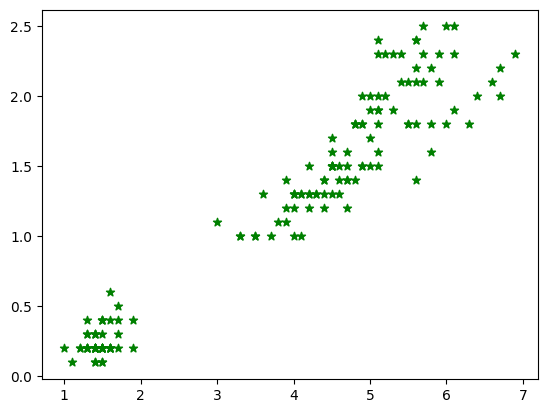

In [32]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],color="green",marker="*")

In [33]:
scaler = MinMaxScaler()
df["petal length (cm)"] = scaler.fit_transform(df[["petal length (cm)"]] )
df["petal width (cm)"] = scaler.fit_transform(df[["petal width (cm)"]])
X=df[["petal length (cm)","petal width (cm)"]]
Y=df["species"]
df

,petal length (cm),petal width (cm),species,species_name
0,0.067797,0.041667,0,setosa
1,0.067797,0.041667,0,setosa
2,0.050847,0.041667,0,setosa
3,0.084746,0.041667,0,setosa
4,0.067797,0.041667,0,setosa
...,...,...,...,...
145,0.711864,0.916667,2,virginica
146,0.677966,0.750000,2,virginica
147,0.711864,0.791667,2,virginica
148,0.745763,0.916667,2,virginica


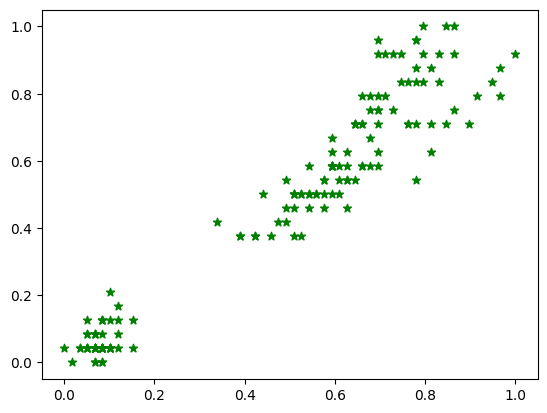

In [34]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],color="green",marker="*")

In [35]:
km=KMeans(n_clusters=3)
df

,petal length (cm),petal width (cm),species,species_name
0,0.067797,0.041667,0,setosa
1,0.067797,0.041667,0,setosa
2,0.050847,0.041667,0,setosa
3,0.084746,0.041667,0,setosa
4,0.067797,0.041667,0,setosa
...,...,...,...,...
145,0.711864,0.916667,2,virginica
146,0.677966,0.750000,2,virginica
147,0.711864,0.791667,2,virginica
148,0.745763,0.916667,2,virginica


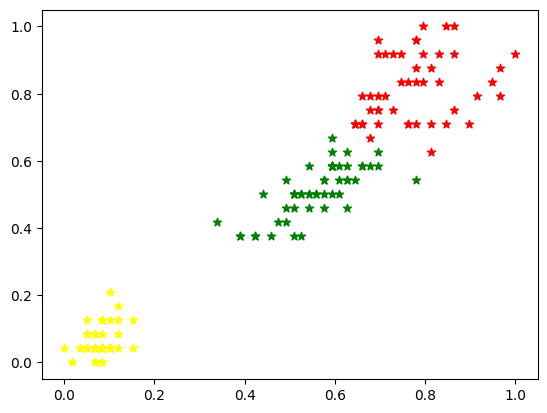

In [39]:
y_predicted = km.fit_predict(X)
df["y_pred"] = y_predicted
df1 = df[df.y_pred==0]
df2 = df[df.y_pred==1]
df3 = df[df.y_pred==2]
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="green",marker="*")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="yellow",marker="*")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="red",marker="*")

In [40]:
k_rng=range(1,10)
sse=[]
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

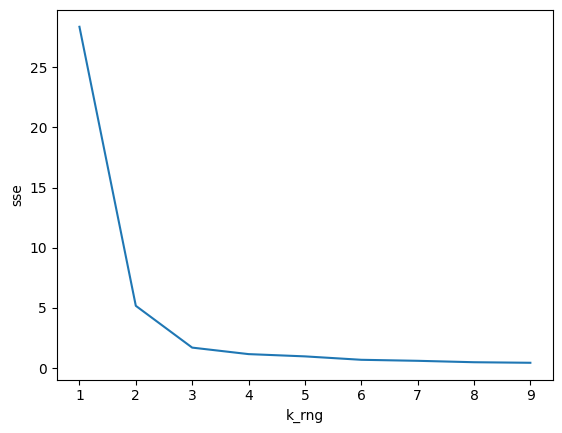

In [41]:
plt.plot(k_rng,sse)
plt.xlabel("k_rng")
plt.ylabel("sse")